# 第8章 ニューラルネットワーク・ディープラーニングの応用（手書き数字の認識）

## 8.1 MNISTデータベース

In [1]:
# リスト 8-1-(1)
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

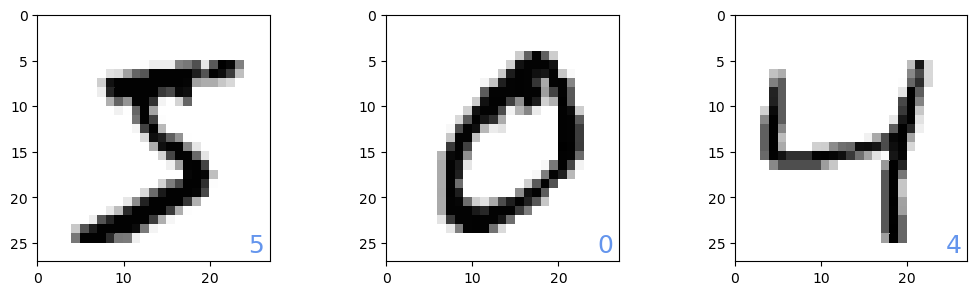

In [3]:
# リスト 8-1-(2)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)  # 白黒を反転して表示
    plt.text(
        24.5, 26, f"{y_train[id]}", color="cornflowerblue", fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
plt.show()

## 8.2 2層フィードフォワードネットワークモデル

In [6]:
# リスト 8-1-(3)
from tensorflow.keras.utils import to_categorical

# 訓練データの前処理
x_train = x_train.reshape(60000, 784)              # (A) 28*28=784
x_train = x_train.astype("float32")                # (B)
x_train = x_train / 255                            # (C) 0~1の実数値に変換する
y_train = to_categorical(y_train, num_classes=10)  # (D) 1-of-k符号化　１つのクラスだけ１にして、他の要素は０にする, num_classes:クラス数
# テストデータの前処理
x_test = x_test.reshape(10000, 784) 
x_test = x_test.astype("float32")
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes=10)

In [8]:
# リスト 8-1-(4)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tensorflow.random.set_seed(seed=1)                   # (A) 乱数の固定

# モデルの定義 ----------
model = Sequential()                                             # (B)   Sequentialモデルの作成
model.add(Dense(units=16, input_dim=784, activation="sigmoid"))  # (C)   中間層の追加 unit:ニューロン数, input-dim:入力の次元数, activation:活性化関数
model.add(Dense(units=10, activation="softmax"))                 # (D)   出力層の追加
model.compile(                                                   # (E)　　optimizer:学習方法の設定(adam), loss="categorical_crossentropy" 目的関数=交差エントロピー誤差,
    loss="categorical_crossentropy", optimizer="adam",           #        metrics=["accuracy"] 学習評価方法=正答率
    metrics=["accuracy"],
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# リスト 8-1-(5)
import time

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,                       #      X_train, T_train:訓練データの指定, vwebose:１で学習過程の表示、０で表示しない
    batch_size=1000, epochs=10, verbose=1,  # (A)  epochs:学習の更新回数を決めるパラメータ, batch_size: 1ステップ分の勾配を計算するのに使う学習データ数
    validation_data=(x_test, y_test),       #      validation_data=(X_test, T_test):評価用のデータの指定
)
score = model.evaluate(x_test, y_test, verbose=0) # モデル評価 model.evaluateで最終的な学習の評価値を出力
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}") #score[0]:テストデータの交差エントロピー誤差, score[1]:テストデータの正答率
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2617 - loss: 2.2216 - val_accuracy: 0.6357 - val_loss: 1.7677
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 1.6696 - val_accuracy: 0.7384 - val_loss: 1.4005
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7476 - loss: 1.3400 - val_accuracy: 0.7971 - val_loss: 1.1543
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 1.1131 - val_accuracy: 0.8353 - val_loss: 0.9741
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.9459 - val_accuracy: 0.8597 - val_loss: 0.8395
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.8201 - val_accuracy: 0.8733 - val_loss: 0.7374
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.7238 - val_accuracy: 0.8828 - val_loss: 0.6585
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.6487 - val_accuracy: 0.8885 - val_loss:

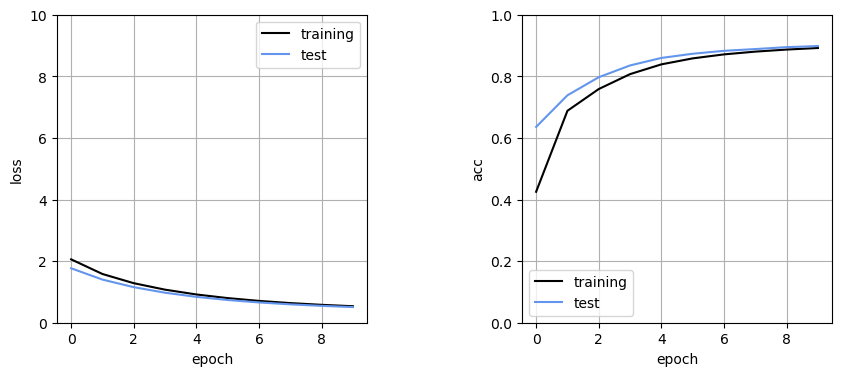

In [11]:
# リスト 8-1-(6)
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# 交差エントロピー誤差の表示 ----------
plt.subplot(1, 2, 1) #1行2列の左側
plt.plot(history.history["loss"], "black", label="training")
plt.plot(history.history["val_loss"], "cornflowerblue", label="test")
plt.legend()
plt.xlabel("epoch") # epochs:学習の更新回数を決めるパラメータ
plt.ylabel("loss")  # 交差エントロピー誤差
plt.ylim(0, 10)
plt.grid()

# 正答率の表示 ----------
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "black", label="training")  #正答率
plt.plot(history.history["val_accuracy"], "cornflowerblue", label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.ylim(0, 1)
plt.grid()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


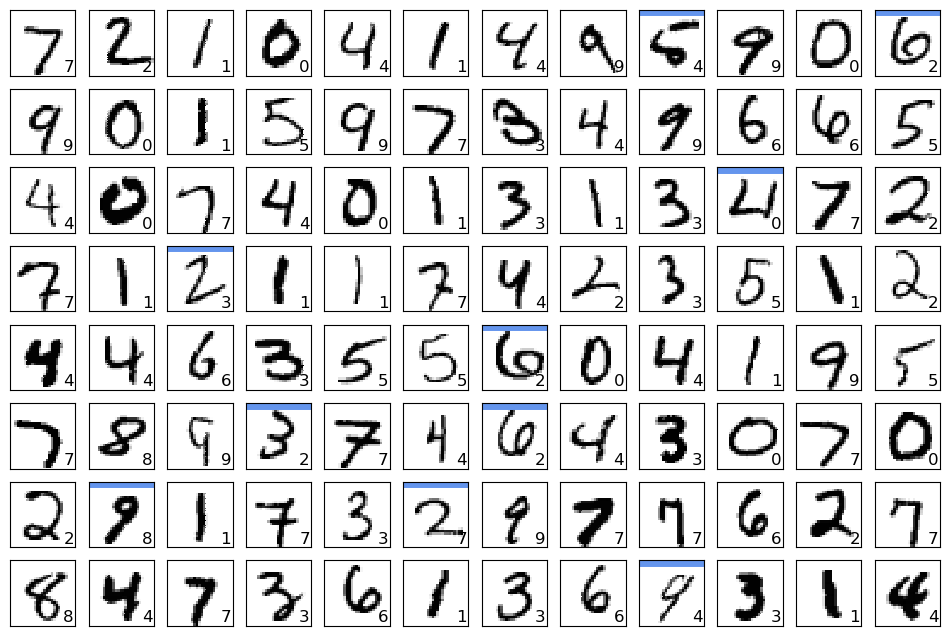

In [12]:
# リスト 8-1-(7)
def show_prediction():
    # テストデータに対する出力を計算 ----------
    n_show = 96
    # (A) yはn_show x 10の行列
    y = model.predict(x_test[:n_show, :]) 

    # 結果の描画 ----------
    plt.figure(figsize=(12, 8))
    for i in range(n_show): # 0-i-95
        x = x_test[i, :] #ここでは96行784列
        x = x.reshape(28, 28) 
        # y[i, j]のj=0～9にはそれぞれの数字に対する確率が入っている
        # 最も確率が大きい数字を予測した数値とする
        prediction = np.argmax(y[i, :]) #配列内で最大値を返す
        plt.subplot(8, 12, i + 1) #8行12列の左上から横書きと同じ順番
        plt.gray()  #デフォルトのカラーマップを削除
        plt.pcolor(1 - x)  # 入力画像の表示（白黒を反転）
        plt.text(22, 25.5, f"{prediction}", fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot(  # 間違っていた場合の青い線の表示
                [0, 27], [1, 1], "cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")  # x軸の目盛りを消す
        plt.yticks([], "")  # y軸の目盛りを消す

# メイン ----------
show_prediction()
plt.show()

## 8.3 ReLU活性化関数

In [16]:
# リスト 8-1-(8)
tensorflow.random.set_seed(seed=1)  # 乱数の固定
# モデルの定義 -----------
model = Sequential()    # Sequentialモデルの作成
model.add(Dense(units=16, input_dim=784, activation="relu"))  # (A) 中間層の作成, unit:ニューロン数, input-dim:入力の次元数, activation:活性化関数(今回はrelu)
model.add(Dense(units=10, activation="softmax"))              # 出力層の作成, unit:ニューロン数, activation:活性化関数(今回はrelu)
model.compile(
    loss="categorical_crossentropy",                          # 交差エントロピー誤差
    optimizer="adam", metrics=["accuracy"],                   # optimizer:学習方法の設定(adam), 学習評価方法:正答率
)
# 学習 ----------
start_time = time.time()                                       
history = model.fit(                                         
    x_train, y_train,                                         # X_train, T_train:訓練データの指定, verbose:１で学習過程の表示、０で表示しない
    batch_size=1000, epochs=10, verbose=1,                    # epochs:学習の更新回数を決めるパラメータ, batch_size: 1ステップ分の勾配を計算するのに使う学習データ数
    validation_data=(x_test, y_test),                         # validation_data=(X_test, T_test):評価用のデータの指定
)
score = model.evaluate(x_test, y_test, verbose=0)             # モデル評価 model.evaluateで最終的な学習の評価値を出力
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")       # score[0]:テストデータの交差エントロピー誤差, score[1]:テストデータの正答率
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4111 - loss: 1.8632 - val_accuracy: 0.7724 - val_loss: 0.9008
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.7703 - val_accuracy: 0.8772 - val_loss: 0.4978
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8772 - loss: 0.4779 - val_accuracy: 0.8989 - val_loss: 0.3935
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8954 - loss: 0.3886 - val_accuracy: 0.9078 - val_loss: 0.3467
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.3442 - val_accuracy: 0.9137 - val_loss: 0.3200
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9113 - loss: 0.3173 - val_accuracy: 0.9162 - val_loss: 0.3025
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.2987 - val_accuracy: 0.9197 - val_loss: 0.2898
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2848 - val_accuracy: 0.9212 - val_loss: 0.2796
Epo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


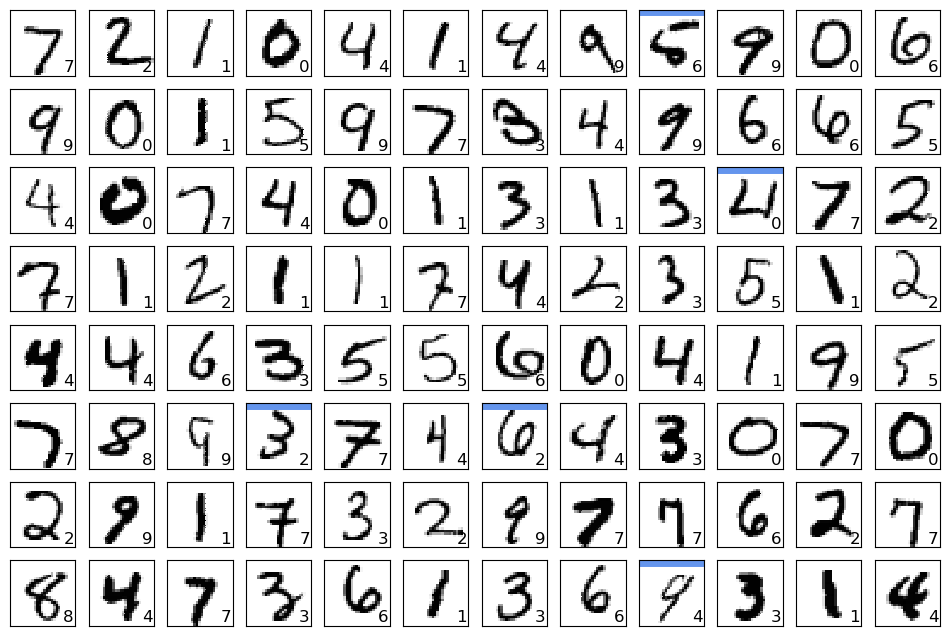

In [19]:
# リスト 8-1-(9)
show_prediction()
plt.show()

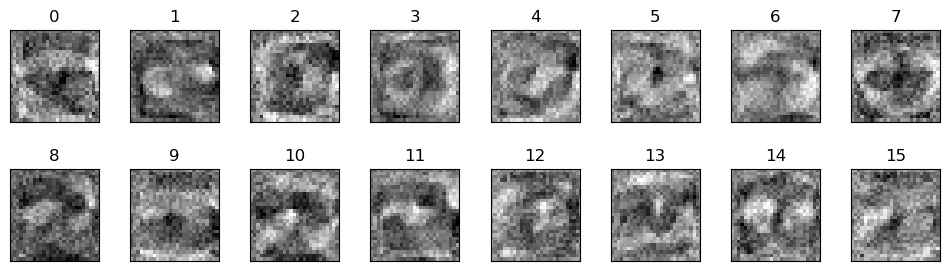

In [20]:
# リスト 8-1-(10)
# 1 層目の重みの視覚化
ws = model.layers[0].get_weights()[0] #ネットワークモデルの中間層の重みパラメータを取得
plt.figure(figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16): #0-i-15
    plt.subplot(2, 8, i + 1)
    w = ws[:, i] #中間層のニューロンごとに抽出
    w = w.reshape(28, 28) #元の形に整形
    plt.pcolor(-w)
    plt.title(f"{i}")
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## 8.4 空間フィルター

In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [28]:
# リスト 8-2-(1)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# mnistデータのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 訓練データの前処理
x_train = x_train.reshape(60000, 28, 28, 1) # 今回は28*28のまま使用する, 白黒画像なのでreshapeの最後の引数は1になる
x_train = x_train.astype("float32")
x_train = x_train / 255                     # 値は0~1のfloat型
y_train = to_categorical(y_train, num_classes=10) # 1-of-k符号化
# テストデータの前処理
x_test = x_test.reshape(10000, 28, 28, 1) 
x_test = x_test.astype("float32")
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes=10)

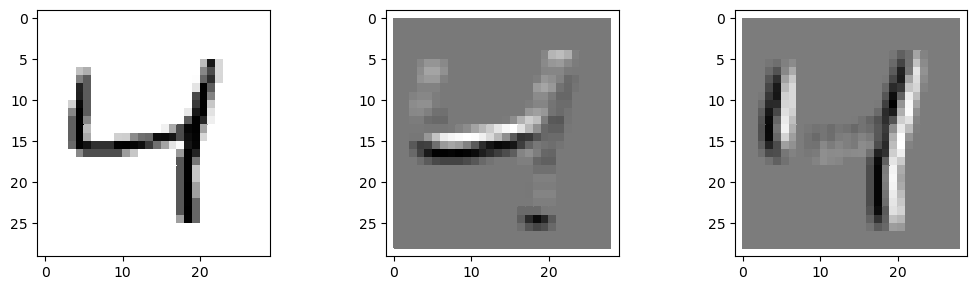

In [30]:
# リスト 8-2-(2)
%matplotlib inline
import matplotlib.pyplot as plt

# フィルターの準備 ----------
myfil1 = np.array([[ 1,  1,  1],                # (A)フィルターの作成
                   [ 1,  1,  1],
                   [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2,  1,  1],                # (B) 
                   [-2,  1,  1],
                   [-2,  1,  1]], dtype=float)

# 入力画像の準備 ----------
id_img = 2  # 使用する画像のインデックス
x_img = x_train[id_img, :, :, 0] #白黒画像なのでチャンネルの数は１つしかないのでインデックス指定は0になる
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)  # 入力画像の整形
out_img1 = np.zeros_like(x_img)  # myfil1の出力用の行列を準備
out_img2 = np.zeros_like(x_img)  # myfil2の出力用の行列を準備

# フィルター処理 ----------
for ih in range(img_h - 3 + 1): # 0-ih-25
    for iw in range(img_w - 3 + 1): # 0-iw-25
        img_part = x_img[ih : ih + 3, iw : iw + 3] #フィルターに合うように3行3列の行列を作成
        out_img1[ih + 1, iw + 1] \
            = img_part.reshape(-1) @ myfil1.reshape(-1)  #行列の積を計算   # \ 逆スラッシュ(opyion + ¥)
        out_img2[ih + 1, iw + 1] \
            = img_part.reshape(-1) @ myfil2.reshape(-1)

# 表示 ----------
plt.figure(figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
# 元画像
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img) #白黒反転
plt.xlim(-1, 29)
plt.ylim(29, -1)
# myfil1の適用
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
# myfil2の適用
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show() # 白:小さい値, 黒:大きい値

## 8.5 畳み込みニューラルネットワーク

In [33]:
# リスト 8-2-(3)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
import time

tensorflow.random.set_seed(seed=1)  # 乱数の固定

# モデルの定義 ----------
model = Sequential()    # Sequentialモデルの作成
model.add(
    Conv2D(                       # (A) コンボリューション層
        filters=8, kernel_size=(3, 3), # 3*3のサイズのフィルターを8枚使う
        padding="same", input_shape=(28, 28, 1),  # padding="same" 出力サイズが変わらないようにパディングをを付加して処理する
        activation="relu",                        # input_shape=(28, 28, 1) 入力画像サイズ　白黒画像なので最後の引数を1にしている
    )
)

# (B) 平滑化層 :コンボリューション層の出力はバッチ数、フィルター数、出力画像の縦幅、出力画像の横幅の４次元なのでこれをバッチ数とその他３つの積の２次元する
model.add(Flatten())             
model.add(Dense(units=10, activation="softmax")) #出力層の作成 ニューロン:10個　　活性化関数:ソフトマックス
model.compile(
    loss="categorical_crossentropy", # 交差エントロピー誤差
    optimizer="adam", metrics=["accuracy"],
)

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,                             # X_train, T_train:訓練データの指定, vwebose:１で学習過程の表示、０で表示しない
    batch_size=1000, epochs=20, verbose=1,        # epochs:学習の更新回数を決めるパラメータ, batch_size: 1ステップ分の勾配を計算するのに使う学習データ数
    validation_data=(x_test, y_test),             # validation_data=(X_test, T_test):評価用のデータの指定
)
score = model.evaluate(x_test, y_test, verbose=0)  # モデル評価 model.evaluateで最終的な学習の評価値を出力
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")           # score[0]:テストデータの交差エントロピー誤差, score[1]:テストデータの正答率
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6699 - loss: 1.4041 - val_accuracy: 0.9005 - val_loss: 0.3616
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9041 - loss: 0.3392 - val_accuracy: 0.9229 - val_loss: 0.2718
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9240 - loss: 0.2661 - val_accuracy: 0.9341 - val_loss: 0.2327
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9367 - loss: 0.2270 - val_accuracy: 0.9426 - val_loss: 0.2034
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9452 - loss: 0.1962 - val_accuracy: 0.9508 - val_loss: 0.1788
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9521 - loss: 0.1707 - val_accuracy: 0.9571 - val_loss: 0.1581
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9585 - loss: 0.1494 - val_accuracy: 0.9619 - val_loss: 0.1414
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9635 - loss: 0.1321 - val_accuracy: 0.9650 - val_loss: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


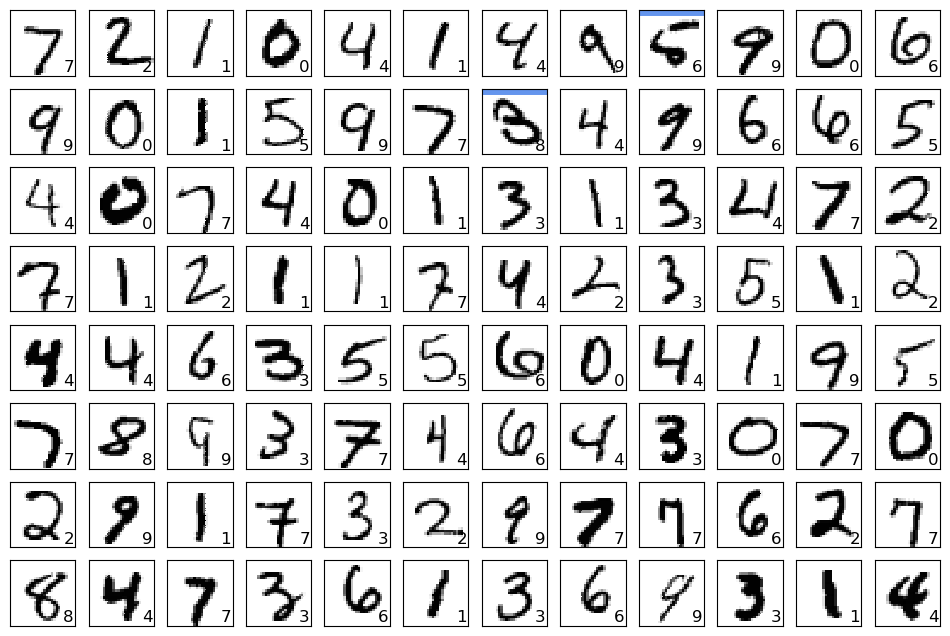

In [35]:
# リスト 8-1-(7)
def show_prediction():
    # テストデータに対する出力を計算 ----------
    n_show = 96
    # (A) yはn_show x 10の行列
    y = model.predict(x_test[:n_show, :])

    # 結果の描画 ----------
    plt.figure(figsize=(12, 8))
    for i in range(n_show): # 0-i-95
        x = x_test[i, :]
        x = x.reshape(28, 28) #　データを整形
        # y[i, j]のj=0～9にはそれぞれの数字に対する確率が入っている
        # 最も確率が大きい数字を予測した数値とする
        prediction = np.argmax(y[i, :])
        plt.subplot(8, 12, i + 1)
        plt.gray()
        plt.pcolor(1 - x)  # 入力画像の表示（白黒を反転）
        plt.text(22, 25.5, f"{prediction}", fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot(  # 間違っていた場合の青い線の表示
                [0, 27], [1, 1], "cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")  # x軸の目盛りを消す
        plt.yticks([], "")  # y軸の目盛りを消す

# リスト 8-2-(4)
show_prediction()
plt.show()


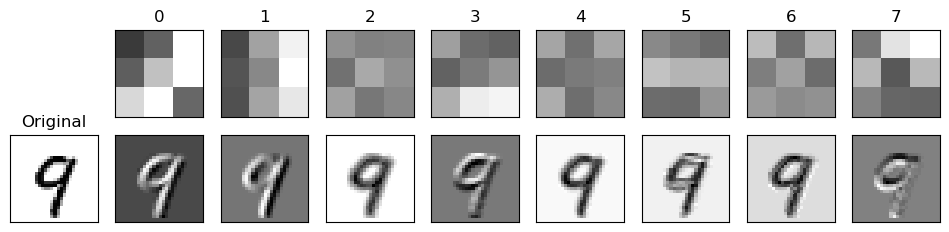

In [37]:
# リスト 8-2-(5)
plt.figure(figsize=(12, 2.5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 入力画像(original)の表示 ----------
id_img = 12  # 使用する画像のインデックス
x_img = x_test[id_img, :, :, 0]  #白黒画像なのでチャンネルの数は１つしかないのでインデックス指定は0になる
img_h, img_w = 28, 28  # 画像サイズ
x_img = x_img.reshape(img_h, img_w) # データの整形
plt.subplot(2, 9, 10) # 2行9列の10番目の位置
plt.gray()
plt.pcolor(-x_img)
plt.title("Original")
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")

# フィルターとフィルター処理した画像の表示 ----------
ws = model.layers[0].get_weights()[0]  # (A) フィルターの重み取得(8*9=72)
max_w, min_w = np.max(ws), np.min(ws)  # 重みの最大最小値
for i in range(8): # 0-i-7
    # フィルターの準備
    w = ws[:, :, 0, i]
    w = w.reshape(3, 3) #データの整形 
    # フィルターの表示
    plt.subplot(2, 9, i + 2)
    plt.pcolor(-w, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title(f"{i}")
    # フィルター処理したindex12の画像の作成
    out_img = np.zeros_like(x_img)  #28行28列
    for ih in range(img_h - 3 + 1):  # フィルター処理
        for iw in range(img_w - 3 + 1):
            img_part = x_img[ih : ih + 3, iw : iw + 3]
            out_img[ih + 1, iw + 1] = \
                img_part.reshape(-1) @ w.reshape(-1)
    # フィルター処理した画像の表示
    plt.subplot(2, 9, i + 11)
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show() #小さい値は白、大きい値は黒で示している

## 8.6 プーリング

## 8.7 ドロップアウト

## 8.8 集大成のMNIST認識ネットワークモデル

In [39]:
# リスト 8-2-(6)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time

tensorflow.random.set_seed(seed=1)  # 乱数の固定

# モデルの定義 ----------
model = Sequential() # Sequentialモデルの作成
model.add(
    Conv2D(                                 # コンボリューション層
        filters=16, kernel_size=(3, 3),     # フィルター数:16, フィルターのサイズ:3*3=9 
        input_shape=(28, 28, 1), activation="relu",  # 入力画像サイズ(28*28, 1(白黒)), 活性化関数: relu
    ) #paddingをしていないので画像サイズが縦・横が-2小さくなる(26, 26)
)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))  #コンボリューション層, 画像サイズ(24,24)
model.add(MaxPooling2D(pool_size=(2, 2)))         # (A) 最大プーリング層(画像の位置ずれの耐性が高くなる) 画像の大きさが半分(12, 12)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) #コンボリューション層, 画像サイズ(10, 10)
model.add(MaxPooling2D(pool_size=(2, 2)))         # (B) 最大プーリング層, 画像サイズ(5, 5)
model.add(Dropout(rate=0.25))                     # (C) ドロップアウト層, Dropout(rate=0.25):残すニューロンの割合
model.add(Flatten())                              # 多次元の配列を一次元の配列にする層（コンバオリューション層や最大プーリング層は多次元)
model.add(Dense(units=128, activation="relu"))    # 中間層の追加 unit:ニューロンの数
model.add(Dropout(rate=0.25))                     # (D) ドロップアウト層
model.add(Dense(units=10, activation="softmax"))  # 出力層の追加
model.compile(
    loss="categorical_crossentropy",  # 交差エントロピー誤差 
    optimizer="adam", metrics=["accuracy"],     # optimizer:学習方法の設定(adam), 学習評価方法:正答率
)

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,          # X_train, T_train:訓練データの指定, vwebose:１で学習過程の表示、０で表示しない
    batch_size=1000, epochs=20, verbose=1,  # epochs:学習の更新回数を決めるパラメータ, batch_size: 1ステップ分の勾配を計算するのに使う学習データ数
    validation_data=(x_test, y_test),   # validation_data=(X_test, T_test):評価用のデータの指定
)
score = model.evaluate(x_test, y_test, verbose=0) # モデル評価 model.evaluateで最終的な学習の評価値を出力
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")  # score[0]:テストデータの交差エントロピー誤差, score[1]:テストデータの正答率
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.6460 - loss: 1.1826 - val_accuracy: 0.9631 - val_loss: 0.1185
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9565 - loss: 0.1455 - val_accuracy: 0.9782 - val_loss: 0.0647
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9720 - loss: 0.0921 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9779 - loss: 0.0719 - val_accuracy: 0.9875 - val_loss: 0.0368
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9862 - loss: 0.0435 - val_accuracy: 0.9911 - val_loss: 0.0262
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.991

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


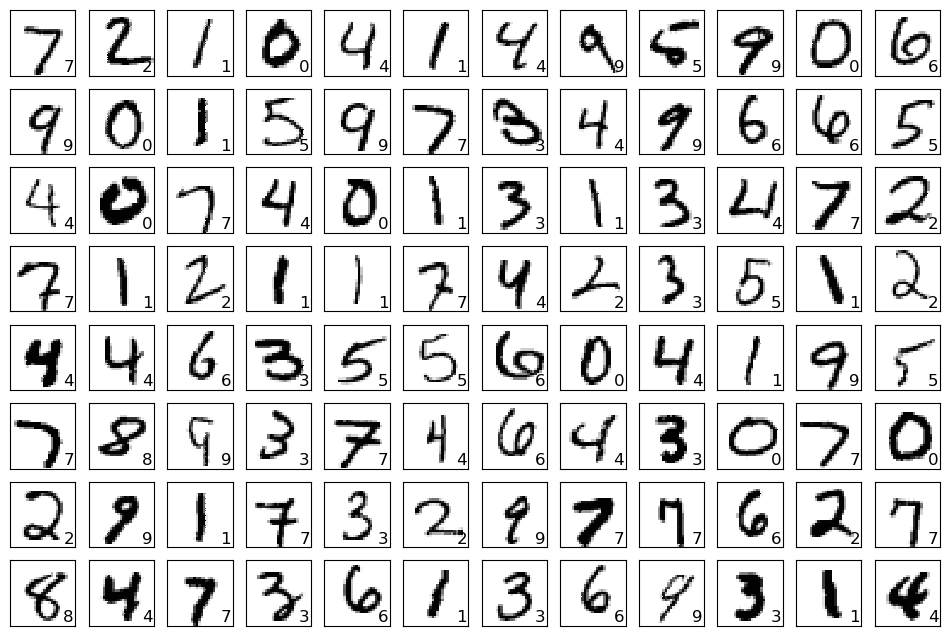

In [41]:
# リスト 8-2-(7)
show_prediction()
plt.show()